## Observations and Insights 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [21]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = study_data_complete[study_data_complete.duplicated(['Mouse ID', 'Timepoint'])]

#view duplicate rows
print(duplicateRows)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_cleaned = study_data_complete.loc[study_data_complete["Mouse ID"] != "g989"]
combined_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
len(combined_cleaned["Mouse ID"].unique())

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_tumorvolume = combined_cleaned.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_tumorvolume 

median_tumorvolume = combined_cleaned.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median_tumorvolume

variance_tumorvolume = combined_cleaned.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance_tumorvolume

std_tumorvolume = combined_cleaned.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
std_tumorvolume 

stme_tumorvolume = combined_cleaned.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
stme_tumorvolume
 
# Assemble the resulting series into a single summary dataframe.

summary_statisticsdf = pd.DataFrame([
    {"mean_tumorvolume": mean_tumorvolume,
    "median_tumorvolume": median_tumorvolume,
    "variance_tumorvolume": variance_tumorvolume,
    "std_tumorvolume": std_tumorvolume,
    "stme_tumorvolume": stme_tumorvolume}
])
display(summary_statisticsdf)


,mean_tumorvolume,median_tumorvolume,variance_tumorvolume,std_tumorvolume,stme_tumorvolume
0,Drug Regimen Capomulin 40.675741 Ceftamin ...,Drug Regimen Capomulin 41.557809 Ceftamin ...,Drug Regimen Capomulin 24.947764 Ceftamin ...,Drug Regimen Capomulin 4.994774 Ceftamin ...,Drug Regimen Capomulin 0.329346 Ceftamin ...


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<BarContainer object of 10 artists>

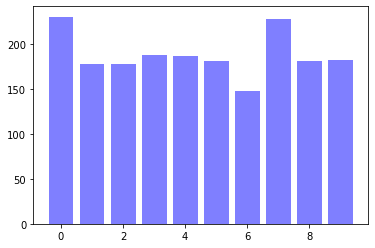

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice_tested = combined_cleaned.groupby("Drug Regimen").count()["Timepoint"]
total_mice_tested

total = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(total))

plt.bar(x_axis, total, color='b', alpha=0.5, align="center")

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin\

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
